In [2]:
import numpy as np
import pygrib
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import pandas as pd
from scipy.constants import convert_temperature
import pytz
from datetime import datetime
from metpy import calc
from metpy.units import units
import matplotlib as mpl
from meteocalc import dew_point
# mpl.rc("savefig", dpi=300)

In [3]:
df1 = pd.read_csv('./observation/ASOS Grand Rapids_crc.csv')
df1

,YEAR,MONTH,DAY,HOUR,atmp,relh,wspd,dew,pcpn
0,2001,1,1,1,NaN,NaN,NaN,NaN,NaN
1,2001,1,1,2,12.92,91.61,3.45,10.941504,NaN
2,2001,1,1,3,15.98,87.47,4.60,12.921454,NaN
3,2001,1,1,4,15.08,83.33,0.00,10.941768,NaN
4,2001,1,1,5,15.98,91.72,4.60,14.000388,NaN
...,...,...,...,...,...,...,...,...,...
157746,2018,12,30,19,30.00,63.18,5.75,19.011422,0.0
157747,2018,12,30,20,28.00,68.57,8.05,19.011347,0.0
157748,2018,12,30,21,28.00,74.67,6.90,21.009401,0.0
157749,2018,12,30,22,30.90,72.18,9.20,23.010169,0.0


In [4]:
df2 = pd.read_csv('./extracted/GRR/GRR_9km.csv')
df2 = df2.drop(df2.index[157751:])
df2

,YEAR,MONTH,DAY,HOUR,atmp,pcpn,relh,srad,wspd,dew
0,2001,1,1,1,10.806840,0.000143,87.136455,0.0,3.738404,7.736436
1,2001,1,1,2,9.858775,0.000056,85.763051,0.0,4.553510,6.452491
2,2001,1,1,3,8.716032,0.000117,87.002676,0.0,4.586482,5.642552
3,2001,1,1,4,7.766237,0.000233,88.074541,0.0,4.355775,4.974006
4,2001,1,1,5,7.169075,0.000308,89.153426,0.0,3.675243,4.650184
...,...,...,...,...,...,...,...,...,...,...
157746,2018,12,30,19,28.657783,0.000000,64.753474,0.0,6.173060,18.294764
157747,2018,12,30,20,28.493098,0.000000,67.980688,0.0,5.826194,19.272163
157748,2018,12,30,21,28.259254,0.000000,71.244934,0.0,5.796198,20.146565
157749,2018,12,30,22,28.319542,0.000000,73.825283,0.0,5.808984,21.041896


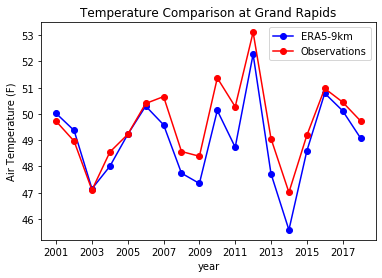

In [11]:
obs_temp_year = df1.groupby(df1.YEAR)['atmp'].mean()
era_temp_year = df2.groupby(df2.YEAR)['atmp'].mean()
plt.plot(list(range(2001,2019)), era_temp_year, 'b-o')
plt.plot(list(range(2001,2019)), obs_temp_year, 'r-o')
plt.xticks([2001,2003,2005,2007,2009,2011,2013,2015,2017])
plt.xlabel('year')
plt.ylabel('Air Temperature (F)')
plt.legend(['ERA5-9km', 'Observations'])
plt.title('Temperature Comparison at Grand Rapids')
plt.savefig('./plot/GRR/ERA5-9km-temp.png')

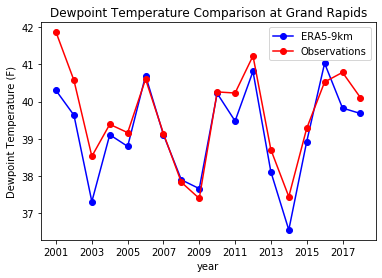

In [12]:
obs_temp_year = df1.groupby(df1.YEAR)['dew'].mean()
era_temp_year = df2.groupby(df2.YEAR)['dew'].mean()
plt.plot(list(range(2001,2019)), era_temp_year, 'b-o')
plt.plot(list(range(2001,2019)), obs_temp_year, 'r-o')
plt.xticks([2001,2003,2005,2007,2009,2011,2013,2015,2017])
plt.xlabel('year')
plt.ylabel('Dewpoint Temperature (F)')
plt.legend(['ERA5-9km', 'Observations'])
plt.title('Dewpoint Temperature Comparison at Grand Rapids')
plt.savefig('./plot/GRR/ERA5-9km-dew.png')

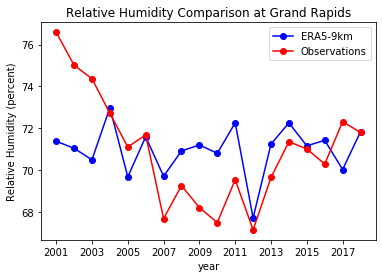

In [13]:
obs_temp_year = df1.groupby(df1.YEAR)['relh'].mean()
era_temp_year = df2.groupby(df2.YEAR)['relh'].mean()
plt.plot(list(range(2001,2019)), era_temp_year, 'b-o')
plt.plot(list(range(2001,2019)), obs_temp_year, 'r-o')
plt.xticks([2001,2003,2005,2007,2009,2011,2013,2015,2017])
plt.xlabel('year')
plt.ylabel('Relative Humidity (percent)')
plt.legend(['ERA5-9km', 'Observations'])
plt.title('Relative Humidity Comparison at Grand Rapids')
plt.savefig('./plot/GRR/ERA5-9km-rh.png')

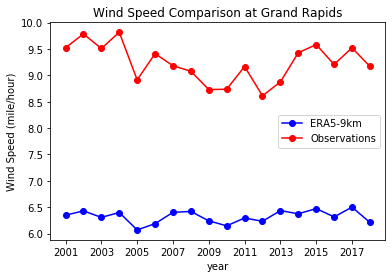

In [16]:
obs_temp_year = df1.groupby(df1.YEAR)['wspd'].mean()
era_temp_year = df2.groupby(df2.YEAR)['wspd'].mean()
plt.plot(list(range(2001,2019)), era_temp_year, 'b-o')
plt.plot(list(range(2001,2019)), obs_temp_year, 'r-o')
plt.xticks([2001,2003,2005,2007,2009,2011,2013,2015,2017])
plt.xlabel('year')
plt.ylabel('Wind Speed (mile/hour)')
plt.legend(['ERA5-9km', 'Observations'])
plt.title('Wind Speed Comparison at Grand Rapids')
plt.savefig('./plot/GRR/ERA5-9km-wind.png')

In [14]:
eastern = pytz.timezone('US/Eastern')
dff = pd.date_range(start='1/1/2001', end='1/1/2019', freq='D')[1:-1].tz_localize(pytz.utc).tz_convert(eastern)
year = dff.strftime('%Y')
mon = dff.strftime('%-m')
day = dff.strftime('%-d')
obs_prcp_days = np.where(np.array(df1.groupby([df1.YEAR,df1.MONTH,df1.DAY])['pcpn'].sum())>0.01,1,0)
dff1 = pd.DataFrame({'YEAR':year, 'MONTH':mon, 'DAY':day,'events': obs_prcp_days})
dff1.astype(float)
obs_frq = dff1.groupby(dff1.YEAR)['events'].sum()
era_prcp_days = np.where(np.array(df2.groupby([df2.YEAR,df2.MONTH,df2.DAY])['pcpn'].sum())>0.01,1,0)
dff2 = pd.DataFrame({'YEAR':year, 'MONTH':mon, 'DAY':day,'events': era_prcp_days})
dff2.astype(float)
era_frq = dff2.groupby(dff2.YEAR)['events'].sum()

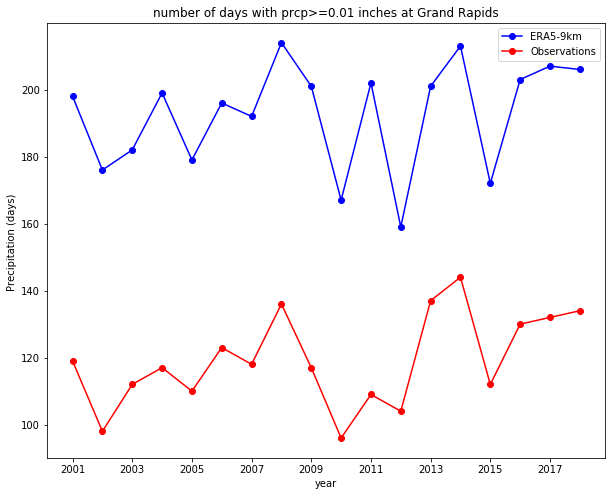

In [15]:
plt.figure(figsize=(10,8))
plt.plot(list(range(2001,2019)), era_frq, 'b-o')
plt.plot(list(range(2001,2019)), obs_frq, 'r-o')
plt.xticks([2001,2003,2005,2007,2009,2011,2013,2015,2017])
plt.xlabel('year')
plt.ylabel('Precipitation (days) ')
plt.legend(['ERA5-9km', 'Observations'])
plt.title('number of days with prcp>=0.01 inches at Grand Rapids')
plt.savefig('./plot/GRR/ERA5-9km-prcp_events.png')